In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Basics

In [4]:
df = pd.read_excel('compactiv.xlsx')

In [10]:
df.head()

lread  lwrite   scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2  40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2    448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4      NaN  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2      NaN   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt   freemem   freeswap   usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40  4659.125  1730946.0  95.0   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  4659.125  1869002.0  97.0   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20   702.000  1021237.0  87.0   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  4659.125  1863704.0  98.0   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60   633.000  1760253.0  90.0   

          runqsz  
0      CPU_Bound  
1  Not_CPU_Bound  
2  Not_CPU_Bound  
3  Not_CPU_Bound  
4  Not_CPU_Bound  

[5 rows x 22 columns]

In [59]:
df.shape

(8192, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [14]:
df.describe().round(2)

lread   lwrite     scall    sread   swrite     fork     exec  \
count  8192.00  8192.00   8192.00  8192.00  8192.00  8192.00  8192.00   
mean     19.56    13.11   2306.32   210.48   150.06     1.88     2.79   
std      53.35    29.89   1633.62   198.98   160.48     2.48     5.21   
min       0.00     0.00    109.00     6.00     7.00     0.00     0.00   
25%       2.00     0.00   1012.00    86.00    63.00     0.40     0.20   
50%       7.00     1.00   2051.50   166.00   117.00     0.80     1.20   
75%      20.00    10.00   3317.25   279.00   185.00     2.20     2.80   
max    1845.00   575.00  12493.00  5318.00  5456.00    20.12    59.56   

            rchar       wchar    pgout  ...   pgfree   pgscan     atch  \
count     8088.00     8177.00  8192.00  ...  8192.00  8192.00  8192.00   
mean    197385.73    95902.99     2.29  ...    11.92    21.53     1.13   
std     239837.49   140841.71     5.31  ...    32.36    71.14     5.71   
min        278.00     1498.00     0.00  ...     0.00     0.00     0.00   
25%      34091.50    22916.00     0.00  ...     0.00     0.00     0.00   
50%     125473.50    46619.00     0.00  ...     0.00     0.00     0.00   
75%     267828.75   106101.00     2.40  ...     5.00     0.00     0.60   
max    2526649.00  1801623.00    81.44  ...   523.00  1237.00   211.58   

          pgin    ppgin     pflt     vflt   freemem    freeswap      usr  
count  8192.00  8192.00  8192.00  8192.00   8192.00     8192.00  8192.00  
mean      8.28    12.39   109.79   185.32   1763.46  1328125.96    83.97  
std      13.87    22.28   114.42   191.00   2482.10   422019.43    18.40  
min       0.00     0.00     0.00     0.20     55.00        2.00     0.00  
25%       0.60     0.60    25.00    45.40    231.00  1042623.50    81.00  
50%       2.80     3.80    63.80   120.40    579.00  1289289.50    89.00  
75%       9.76    13.80   159.60   251.80   2002.25  1730379.50    94.00  
max     141.20   292.61   899.80  1365.00  12027.00  2243187.00    99.00  

[8 rows x 21 columns]

In [10]:
df['runqsz'].unique()

array(['CPU_Bound', 'Not_CPU_Bound'], dtype=object)

### Univariate Analysis

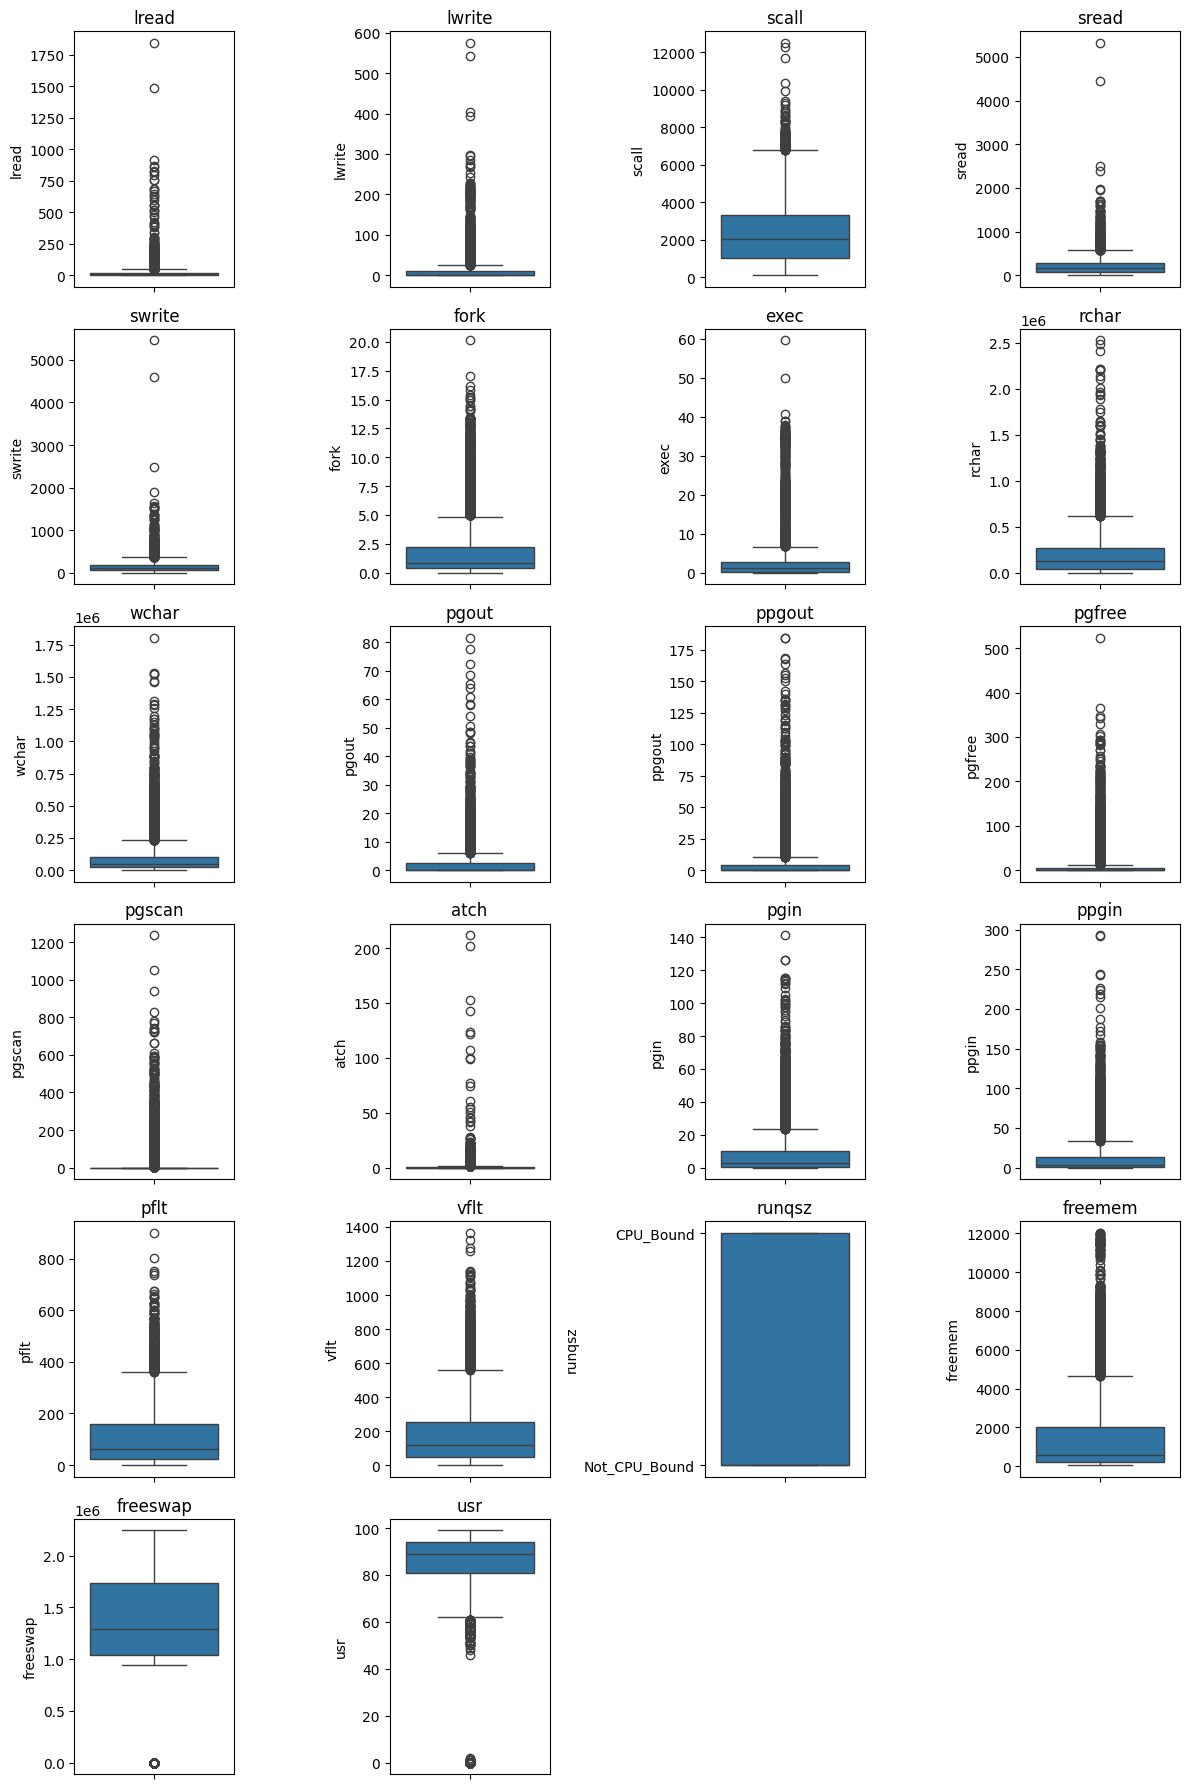

In [16]:
plt.figure(figsize = (12,18))
feature_list = df.columns
for i in range(22):
    plt.subplot(6, 4, i+1)
    sns.boxplot(y = df[feature_list[i]], data=df)
    plt.title('{}'.format(feature_list[i]))
    plt.tight_layout()

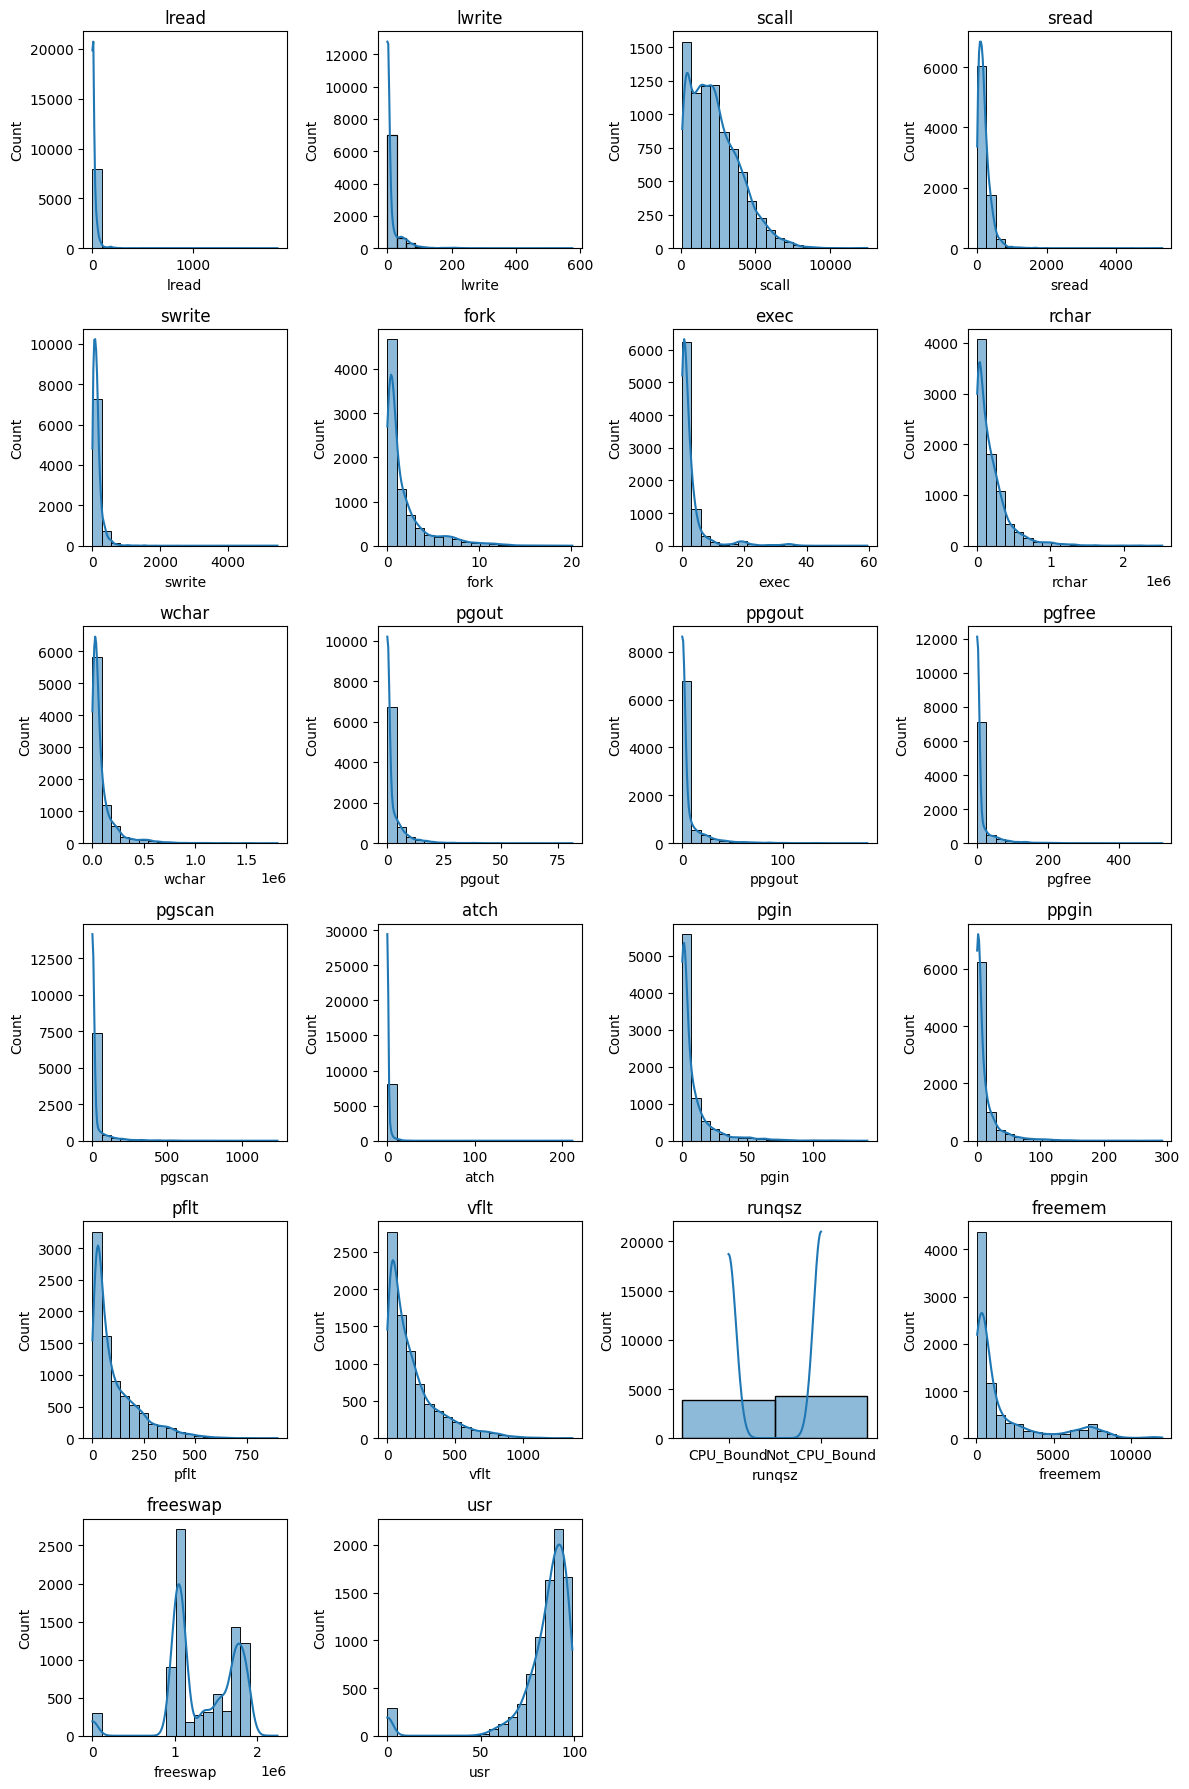

In [15]:
plt.figure(figsize = (12,18))
feature_list = df.columns
for i in range(22):
    plt.subplot(6, 4, i+1)
    sns.histplot(x = df[feature_list[i]], bins=20, kde=True)
        plt.title('{}'.format(feature_list[i]))
    plt.tight_layout()

In [67]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [38]:
df[['rchar', 'wchar']].describe().T.round(2)

count       mean        std     min      25%       50%        75%  \
rchar  8088.0  197385.73  239837.49   278.0  34091.5  125473.5  267828.75   
wchar  8177.0   95902.99  140841.71  1498.0  22916.0   46619.0  106101.00   

             max  
rchar  2526649.0  
wchar  1801623.0

In [11]:
median_rchar = df['rchar'].median()

In [12]:
df.fillna({'rchar': median_rchar}, inplace=True)

In [13]:
df['rchar'].isnull().sum()

0

In [14]:
median_wchar = df['wchar'].median()
df.fillna({'wchar': median_wchar}, inplace=True)

In [98]:
df['wchar'].isnull().sum()

0

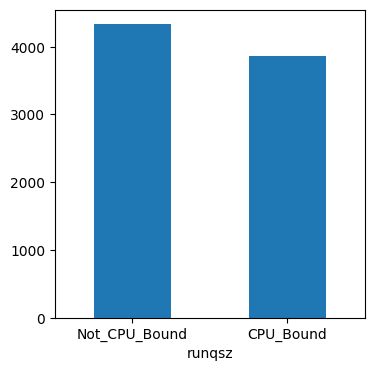

In [26]:
plt.figure(figsize=[4,4])
df['runqsz'].value_counts().plot(kind='bar');
plt.xticks(rotation=0);

In [21]:
df.duplicated().sum()

0

In [5]:
col = df.pop('runqsz')
df.insert(21,col.name, col)

### Outlier Treatment

In [15]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [16]:
feature_list = df.iloc[:,0:21].columns

In [18]:
for i in feature_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

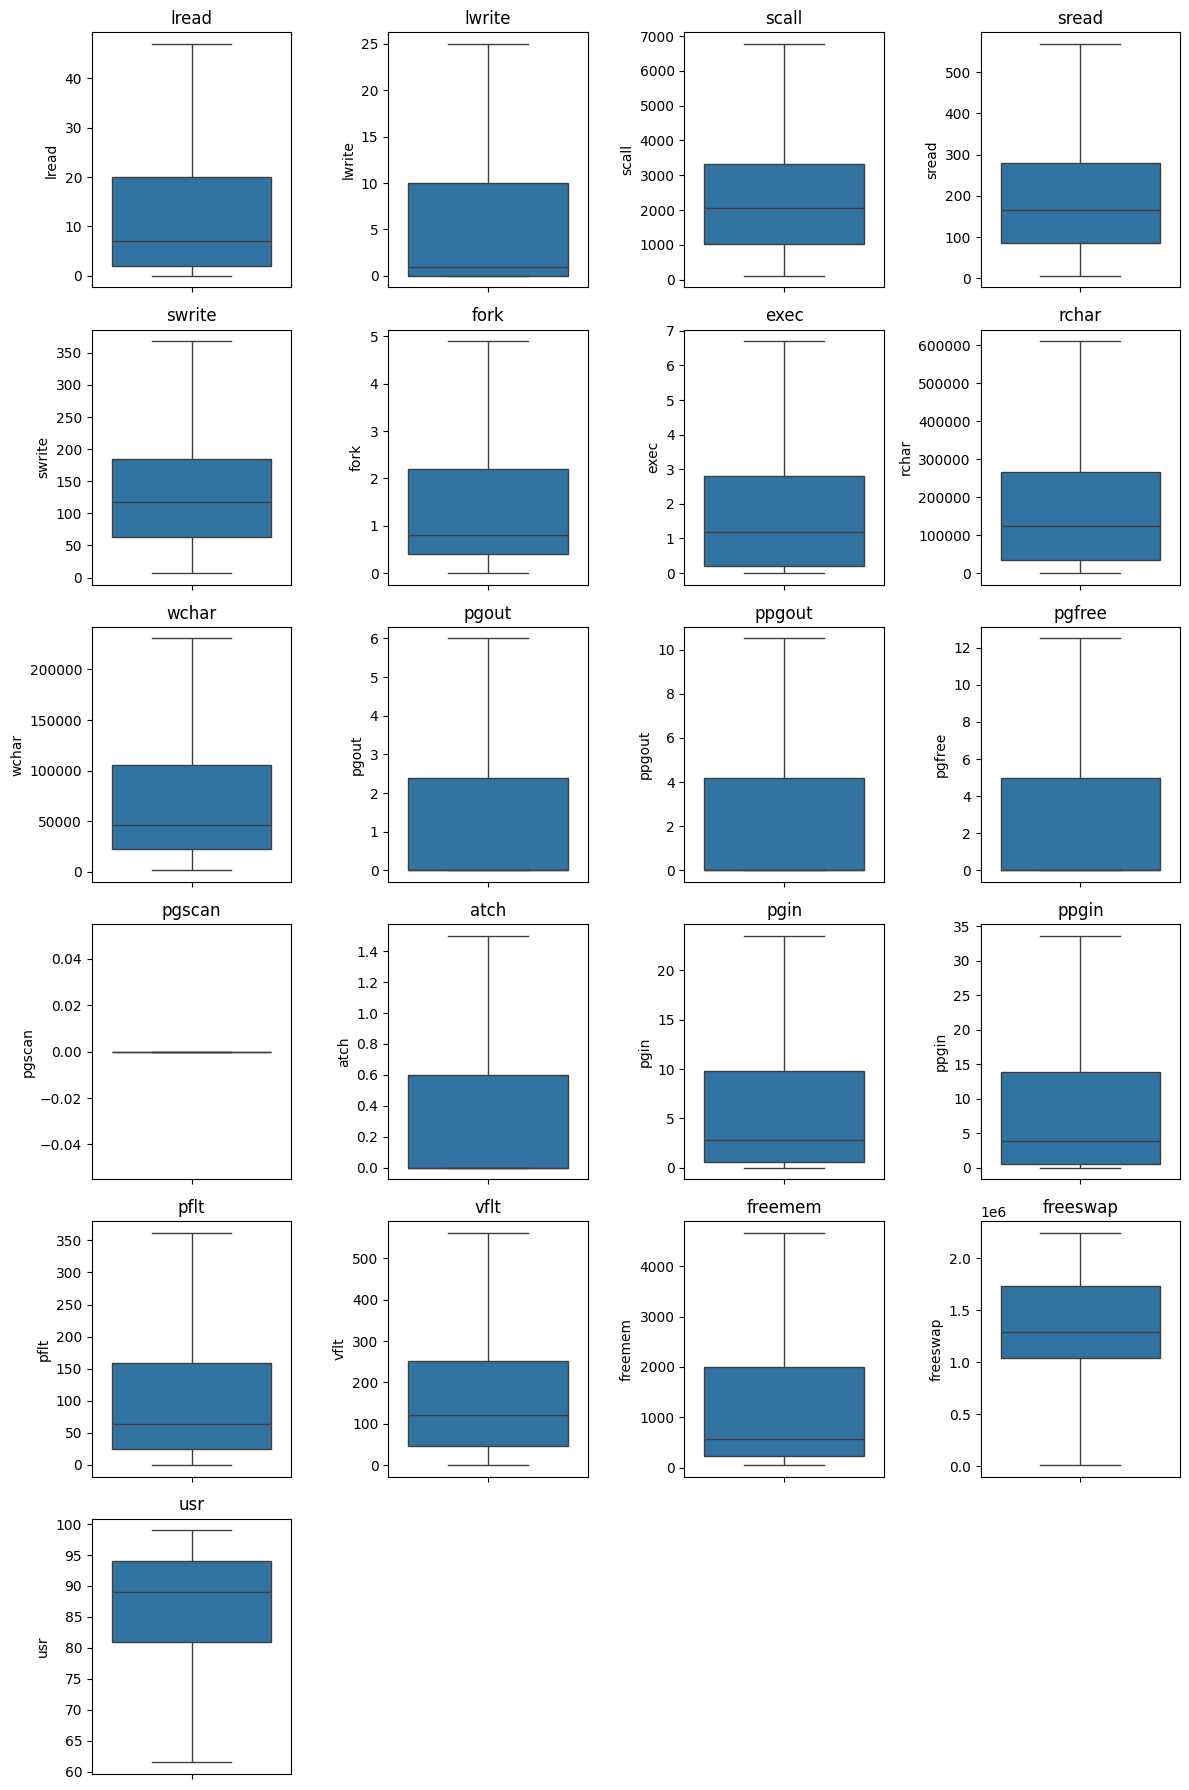

In [107]:
plt.figure(figsize = (12,18))
feature_list = df.iloc[:,0:21].columns
for i in range(21):
    plt.subplot(6, 4, i+1)
    sns.boxplot(y = df[feature_list[i]], data=df)
    plt.title('{}'.format(feature_list[i]))
    plt.tight_layout();

### Bivariate Analysis

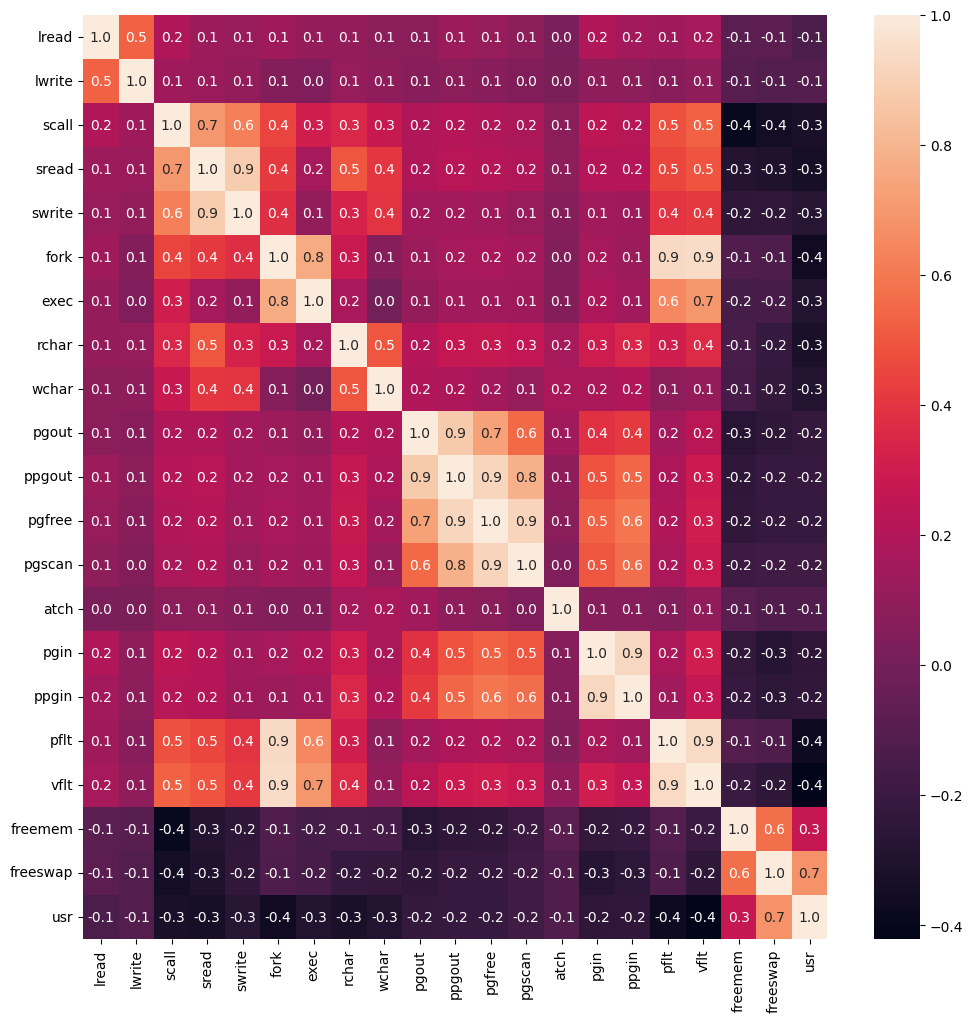

In [58]:
plt.figure(figsize=[12,12])
sns.heatmap(data=df.iloc[:,0:21].corr(), annot=True, fmt='.1f');

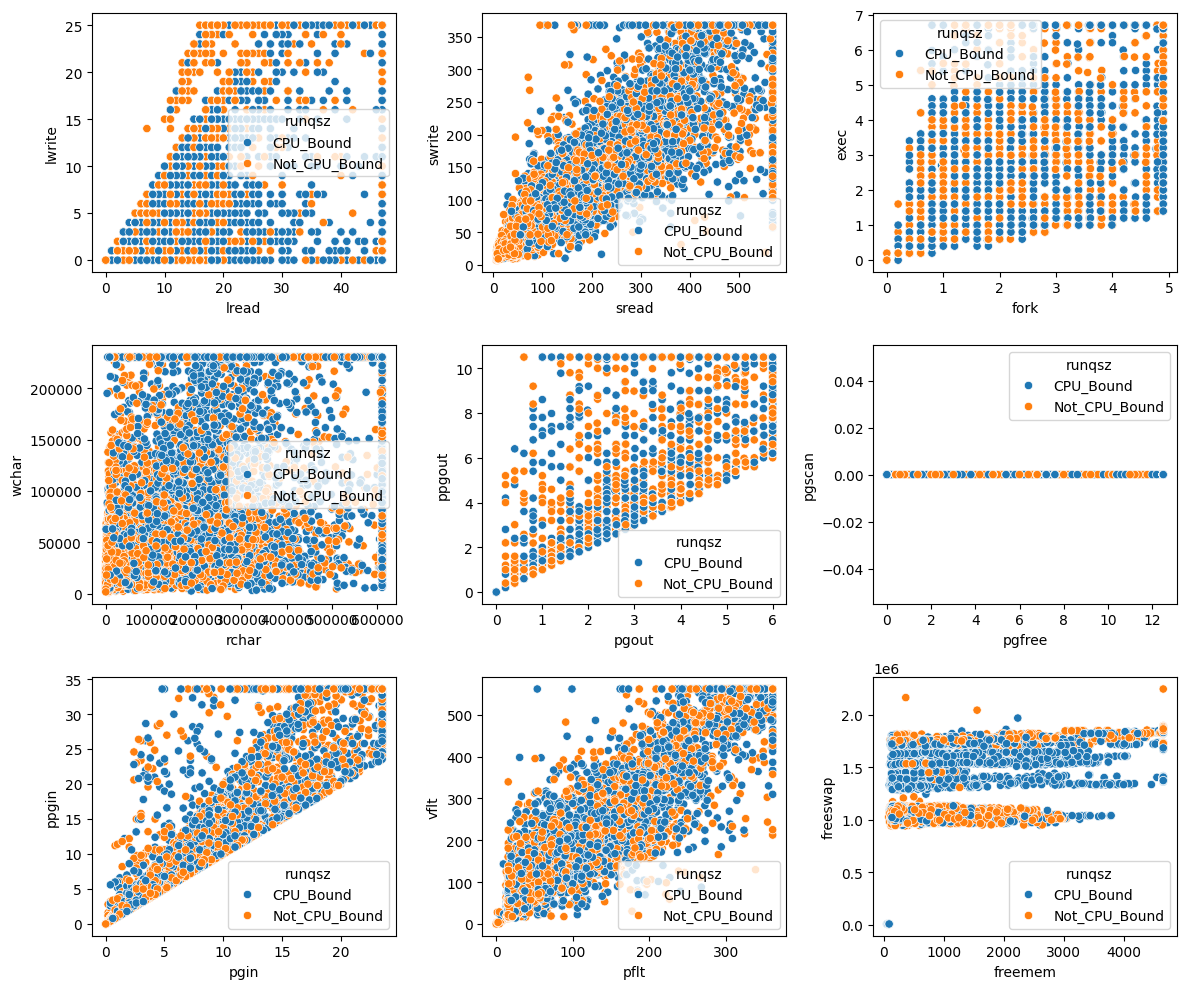

In [125]:
plt.figure(figsize=[12,10])
plt.subplot(3,3,1)
sns.scatterplot(data=df, x='lread', y='lwrite', hue='runqsz');
plt.subplot(3,3,2)
sns.scatterplot(data=df, x='sread', y='swrite', hue='runqsz');
plt.subplot(3,3,3)
sns.scatterplot(data=df, x='fork', y='exec', hue='runqsz');
plt.subplot(3,3,4)
sns.scatterplot(data=df, x='rchar', y='wchar', hue='runqsz');
plt.subplot(3,3,5)
sns.scatterplot(data=df, x='pgout', y='ppgout', hue='runqsz');
plt.subplot(3,3,6)
sns.scatterplot(data=df, x='pgfree', y='pgscan', hue='runqsz');
plt.subplot(3,3,7)
sns.scatterplot(data=df, x='pgin', y='ppgin', hue='runqsz');
plt.subplot(3,3,8)
sns.scatterplot(data=df, x='pflt', y='vflt', hue='runqsz');
plt.subplot(3,3,9)
sns.scatterplot(data=df, x='freemem', y='freeswap', hue='runqsz');
plt.tight_layout();

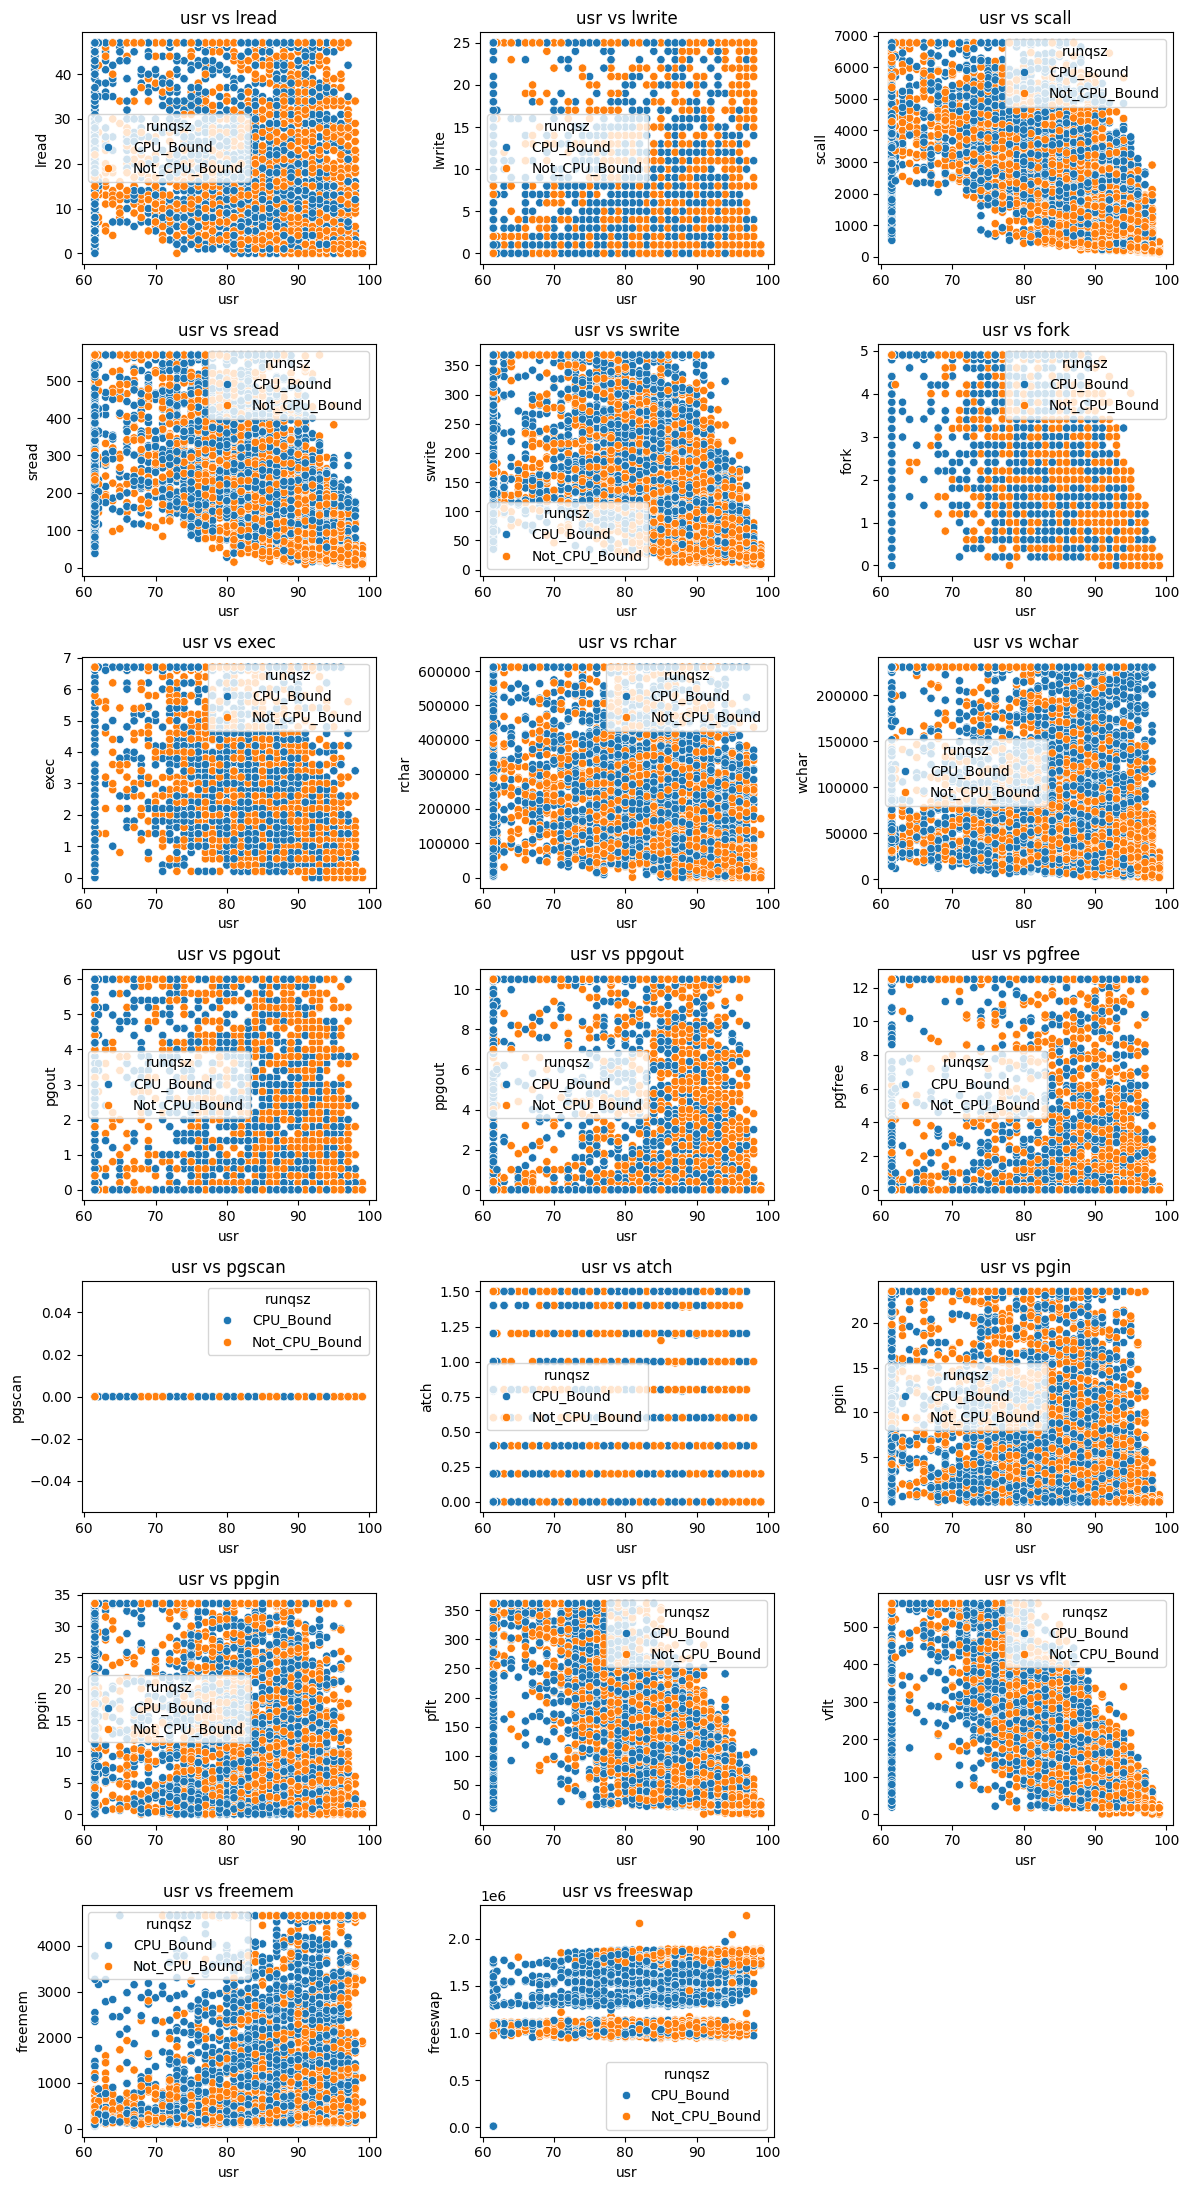

In [126]:
plt.figure(figsize=[12,22])
for i in range(20):
    plt.subplot(7, 3, i+1)
    sns.scatterplot(data=df, x='usr', y=df.columns[i], hue='runqsz')
    plt.title(f'usr vs {df.columns[i]}')
plt.tight_layout();

### Create Dummy Variables and Split Data

In [19]:
df = pd.get_dummies(df, columns=['runqsz'], drop_first=True)

In [20]:
df['runqsz_Not_CPU_Bound'] = df['runqsz_Not_CPU_Bound'].astype(int)

In [133]:
df.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt   freemem   freeswap   usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40  4659.125  1730946.0  95.0   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  4659.125  1869002.0  97.0   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20   702.000  1021237.0  87.0   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  4659.125  1863704.0  98.0   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60   633.000  1760253.0  90.0   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

In [21]:
X = df.drop(['usr'], axis=1)
y = df['usr']

In [22]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
X = sm.add_constant(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Fit Linear Model

In [25]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [26]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:33:09   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5713   BIC:                         3.350e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1217 

### Check Multicollinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)

/Users/Sardiwal_Anirudh/anaconda3/envs/notebook/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [146]:
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   29.229332
lread                    5.350560
lwrite                   4.328397
scall                    2.960609
sread                    6.420172
swrite                   5.597135
fork                    13.035359
exec                     3.241417
rchar                    2.133616
wchar                    1.584381
pgout                   11.360363
ppgout                  29.404223
pgfree                  16.496748
pgscan                        NaN
atch                     1.875901
pgin                    13.809339
ppgin                   13.951855
pflt                    12.001460
vflt                    15.971049
freemem                  1.961304
freeswap                 1.841239
runqsz_Not_CPU_Bound     1.156815
dtype: float64



In [147]:
X_train2 = X_train.drop(["fork"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [148]:
X_train3 = X_train.drop(["pgout"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [150]:
X_train4 = X_train.drop(["ppgout"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [151]:
X_train5 = X_train.drop(["pgfree"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [152]:
X_train6 = X_train.drop(["pgscan"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train5)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [154]:
X_train7 = X_train.drop(["pgin"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train7)
olsres_6 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [156]:
X_train8 = X_train.drop(["ppgin"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train8)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [158]:
X_train9 = X_train.drop(["pflt"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train9)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.786 
Adjusted R-squared: 0.785


In [159]:
X_train10 = X_train.drop(["vflt"], axis=1)
olsmod_9 = sm.OLS(y_train, X_train10)
olsres_9 = olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [28]:
X_train = X_train.drop(['fork'], axis=1)

In [170]:
olsmod_10 = sm.OLS(y_train, X_train)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:01:15   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1132 

In [171]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   28.797906
lread                    5.345759
lwrite                   4.317084
scall                    2.916206
sread                    6.403125
swrite                   5.424224
exec                     2.978791
rchar                    2.133456
wchar                    1.584317
pgout                   11.355343
ppgout                  29.386056
pgfree                  16.495446
pgscan                        NaN
atch                     1.869599
pgin                    13.791964
ppgin                   13.937639
pflt                    10.336398
vflt                    12.366708
freemem                  1.961289
freeswap                 1.817472
runqsz_Not_CPU_Bound     1.156491
dtype: float64



/Users/Sardiwal_Anirudh/anaconda3/envs/notebook/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [172]:
X_train11 = X_train.drop(["ppgout"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [29]:
X_train = X_train.drop(['ppgout'], axis=1)

In [175]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                   28.605018
lread                    5.345629
lwrite                   4.317050
scall                    2.915790
sread                    6.403038
swrite                   5.424224
exec                     2.977633
rchar                    2.133455
wchar                    1.580804
pgout                    6.453728
pgfree                   6.170928
pgscan                        NaN
atch                     1.869320
pgin                    13.767649
ppgin                   13.883225
pflt                    10.335353
vflt                    12.366402
freemem                  1.959259
freeswap                 1.814809
runqsz_Not_CPU_Bound     1.156115
dtype: float64



/Users/Sardiwal_Anirudh/anaconda3/envs/notebook/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [30]:
X_train = X_train.drop(['pgscan'], axis=1)

In [177]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                   28.605018
lread                    5.345629
lwrite                   4.317050
scall                    2.915790
sread                    6.403038
swrite                   5.424224
exec                     2.977633
rchar                    2.133455
wchar                    1.580804
pgout                    6.453728
pgfree                   6.170928
atch                     1.869320
pgin                    13.767649
ppgin                   13.883225
pflt                    10.335353
vflt                    12.366402
freemem                  1.959259
freeswap                 1.814809
runqsz_Not_CPU_Bound     1.156115
dtype: float64



In [31]:
X_train = X_train.drop(['pgin'], axis=1)

In [179]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                   28.410748
lread                    5.342541
lwrite                   4.316923
scall                    2.913481
sread                    6.402060
swrite                   5.424173
exec                     2.976546
rchar                    2.121945
wchar                    1.579863
pgout                    6.444959
pgfree                   6.155181
atch                     1.869236
ppgin                    1.663852
pflt                    10.264112
vflt                    12.211275
freemem                  1.959258
freeswap                 1.806129
runqsz_Not_CPU_Bound     1.156015
dtype: float64



In [32]:
X_train = X_train.drop(['pflt'], axis=1)

In [181]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                   27.937620
lread                    5.312158
lwrite                   4.289233
scall                    2.907107
sread                    6.401598
swrite                   5.395886
exec                     2.838267
rchar                    2.121590
wchar                    1.579800
pgout                    6.439619
pgfree                   6.141911
atch                     1.863836
ppgin                    1.560091
vflt                     4.120082
freemem                  1.957697
freeswap                 1.754044
runqsz_Not_CPU_Bound     1.155947
dtype: float64



In [182]:
olsmod_12 = sm.OLS(y_train, X_train)
olsres_12 = olsmod_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1298.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:06:07   Log-Likelihood:                -16821.
No. Observations:                5734   AIC:                         3.368e+04
Df Residuals:                    5717   BIC:                         3.379e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.8933 

In [33]:
X_train11 = X_train.drop(["sread"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.784 
Adjusted R-squared: 0.784


In [34]:
X_train = X_train.drop(['sread'], axis=1)

In [186]:
olsmod_12 = sm.OLS(y_train, X_train)
olsres_12 = olsmod_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1384.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:10:14   Log-Likelihood:                -16821.
No. Observations:                5734   AIC:                         3.367e+04
Df Residuals:                    5718   BIC:                         3.378e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.8996 

In [187]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                   27.876901
lread                    5.302434
lwrite                   4.278503
scall                    2.649495
swrite                   3.072955
exec                     2.826349
rchar                    1.713951
wchar                    1.569066
pgout                    6.438812
pgfree                   6.141543
atch                     1.862188
ppgin                    1.557518
vflt                     4.076158
freemem                  1.957271
freeswap                 1.742865
runqsz_Not_CPU_Bound     1.155932
dtype: float64



In [35]:
X_train11 = X_train.drop(["pgout"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.782 
Adjusted R-squared: 0.782


In [36]:
X_train = X_train.drop(['pgout'], axis=1)

In [37]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                   27.872707
lread                    5.300744
lwrite                   4.277613
scall                    2.647395
swrite                   3.072586
exec                     2.825032
rchar                    1.712931
wchar                    1.564260
pgfree                   1.955449
atch                     1.733836
ppgin                    1.557376
vflt                     4.075726
freemem                  1.951579
freeswap                 1.742761
runqsz_Not_CPU_Bound     1.151808
dtype: float64



In [38]:
X_train11 = X_train.drop(["lread"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.78 
Adjusted R-squared: 0.779


In [39]:
X_train = X_train.drop(['lread'], axis=1)

In [40]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                   27.852894
lwrite                   1.053395
scall                    2.642191
swrite                   3.072309
exec                     2.795750
rchar                    1.712827
wchar                    1.562382
pgfree                   1.955423
atch                     1.733793
ppgin                    1.526159
vflt                     3.859098
freemem                  1.951417
freeswap                 1.740384
runqsz_Not_CPU_Bound     1.140560
dtype: float64



In [ ]:
X_train11 = X_train.drop(["swrite"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

In [43]:
X_train = X_train.drop(['swrite'], axis=1)

In [44]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                   27.376831
lwrite                   1.053392
scall                    1.766267
exec                     2.507945
rchar                    1.712668
wchar                    1.423429
pgfree                   1.955420
atch                     1.731581
ppgin                    1.521674
vflt                     3.169497
freemem                  1.930806
freeswap                 1.739223
runqsz_Not_CPU_Bound     1.140558
dtype: float64



In [73]:
X_train11 = X_train.drop(["rchar"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.774 
Adjusted R-squared: 0.773


In [74]:
X_train = X_train.drop(['rchar'], axis=1)

In [75]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                   27.153614
lwrite                   1.053077
scall                    1.763109
exec                     2.507007
wchar                    1.211316
pgfree                   1.953643
atch                     1.716507
ppgin                    1.480245
vflt                     3.010137
freemem                  1.917788
freeswap                 1.731634
runqsz_Not_CPU_Bound     1.124738
dtype: float64



### Test for Linearity and Independence

In [48]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_11.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_11.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0           91.0      89.609360   1.390640
1           94.0      91.614706   2.385294
2           61.5      78.059951 -16.559951
3           83.0      79.634490   3.365510
4           94.0      97.162035  -3.162035

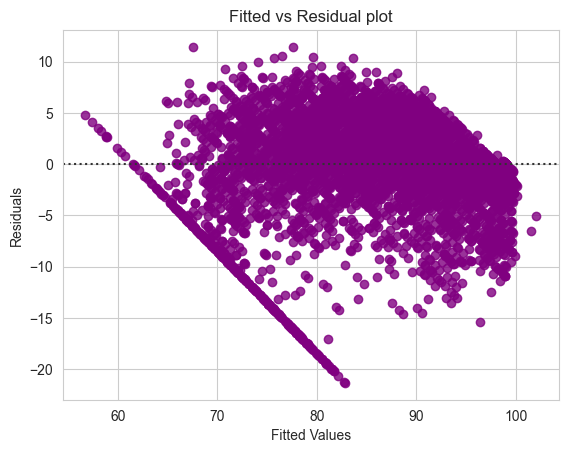

In [49]:
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=False
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [50]:
X_train.columns

Index(['const', 'lwrite', 'scall', 'exec', 'rchar', 'wchar', 'pgfree', 'atch',
       'ppgin', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

### Test for Normality

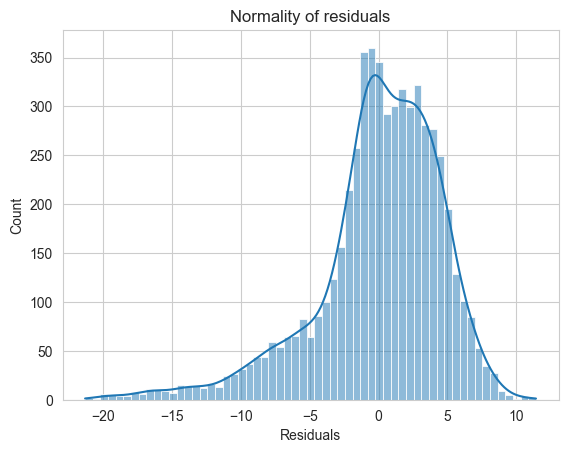

In [51]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

In [52]:
import pylab
import scipy.stats as stats

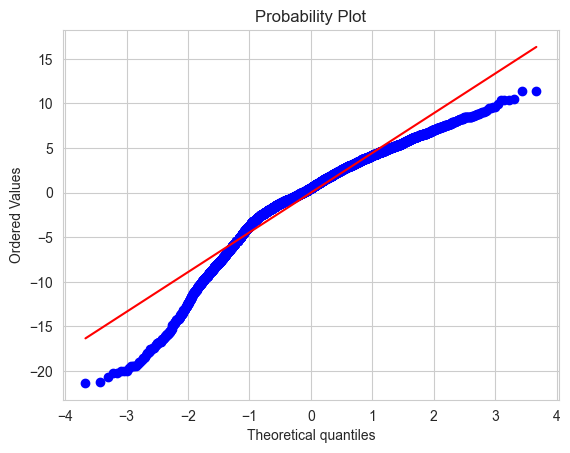

In [53]:
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [54]:
stats.shapiro(df_pred["Residuals"])

/var/folders/qr/rb2cndh91s11z756vfxgd8dc0000gn/T/ipykernel_83565/3699091887.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5734.
  stats.shapiro(df_pred["Residuals"])


ShapiroResult(statistic=0.9328242367382822, pvalue=4.904257702789404e-45)

### Test for Homoscedasticity

In [55]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [57]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 1.1173254143000482), ('p-value', 0.0015268113897567292)]

### Final Model

In [76]:
print(olsres_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1777.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:51:07   Log-Likelihood:                -16958.
No. Observations:                5734   AIC:                         3.394e+04
Df Residuals:                    5722   BIC:                         3.402e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.2204 

### Predictions

In [87]:
olsres_11.params.round(3)

const                   84.220
lwrite                  -0.027
scall                   -0.001
exec                    -0.440
wchar                   -0.000
pgfree                  -0.086
atch                     0.388
ppgin                   -0.043
vflt                    -0.029
freemem                 -0.000
freeswap                 0.000
runqsz_Not_CPU_Bound     1.823
dtype: float64

In [78]:
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_11.params[i].round(3), "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(olsres_11.params[i].round(3),"* (", X_train.columns[i],")","+",end="  ",)
    else:
        print(olsres_11.params[i].round(3), "* (", X_train.columns[i], ")")

usr = 84.22 + -0.027 * ( lwrite ) +  -0.001 * ( scall ) +  -0.44 * ( exec ) +  -0.0 * ( wchar ) +  -0.086 * ( pgfree ) +  0.388 * ( atch ) +  -0.043 * ( ppgin ) +  -0.029 * ( vflt ) +  -0.0 * ( freemem ) +  0.0 * ( freeswap ) +  1.823 * ( runqsz_Not_CPU_Bound )


/var/folders/qr/rb2cndh91s11z756vfxgd8dc0000gn/T/ipykernel_83565/3618590803.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(olsres_11.params[i].round(3), "+", end=" ")
/var/folders/qr/rb2cndh91s11z756vfxgd8dc0000gn/T/ipykernel_83565/3618590803.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(olsres_11.params[i].round(3),"* (", X_train.columns[i],")","+",end="  ",)
/var/folders/qr/rb2cndh91s11z756vfxgd8dc0000gn/T/ipykernel_83565/3618590803.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent w

In [79]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [80]:
X_train.columns

Index(['const', 'lwrite', 'scall', 'exec', 'wchar', 'pgfree', 'atch', 'ppgin',
       'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [81]:
X_test2 = X_test[X_train.columns]

In [82]:
y_pred = olsres_11.predict(X_test2)

In [83]:
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"])).round(3)
rmse1

4.607

In [84]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred)).round(3)
rmse2

4.852

In [85]:
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"]).round(3)
mae1

3.415

In [86]:
mae2 = mean_absolute_error(y_test, y_pred).round(3)
mae2

3.572